# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [154]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import lognorm
from scipy.stats import normaltest
%matplotlib inline

### Step 2: Read in your data set 

In [155]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print(df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [156]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [157]:
print(df_raw)

     admit    gre   gpa  prestige
0        0  380.0  3.61       3.0
1        1  660.0  3.67       3.0
2        1  800.0  4.00       1.0
3        1  640.0  3.19       4.0
4        0  520.0  2.93       4.0
5        1  760.0  3.00       2.0
6        1  560.0  2.98       1.0
7        0  400.0  3.08       2.0
8        1  540.0  3.39       3.0
9        0  700.0  3.92       2.0
10       0  800.0  4.00       4.0
11       0  440.0  3.22       1.0
12       1  760.0  4.00       1.0
13       0  700.0  3.08       2.0
14       1  700.0  4.00       1.0
15       0  480.0  3.44       3.0
16       0  780.0  3.87       4.0
17       0  360.0  2.56       3.0
18       0  800.0  3.75       2.0
19       1  540.0  3.81       1.0
20       0  500.0  3.17       3.0
21       1  660.0  3.63       2.0
22       0  600.0  2.82       4.0
23       0  680.0  3.19       4.0
24       1  760.0  3.35       2.0
25       1  800.0  3.66       1.0
26       1  620.0  3.61       1.0
27       1  520.0  3.74       4.0
28       1  78

In [158]:
df_raw.describe()

admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: 

The values are more spread apart in GRE than GPA

#### Question 4. Drop data points with missing data


In [159]:
df_raw = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Count the rows and see if its reduced then look at the data types to see if they're nan. finally, running a regression to see if nan pops up

#### Question 6. Create box plots for GRE and GPA

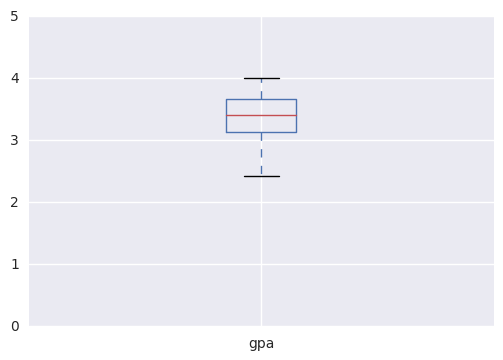

In [160]:
#boxplot 1
ax = df_raw.boxplot(column='gpa')
ax.set_ylim([0, 5]);

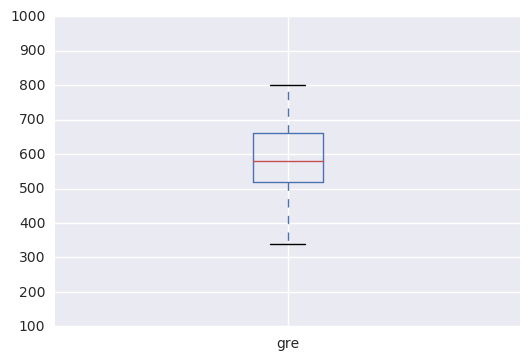

In [161]:
#boxplot 2
ax = df_raw.boxplot(column='gre')
ax.set_ylim([100, 1000]);

#### Question 7. What do this plots show?

Answer: 

there is skew to both since its not symmetrical

#### Question 8. Describe each distribution 

In [162]:
#looks like mean is higher but don't yet know if its statistically significant. Looks skewed

admit
0    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
1    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
dtype: object

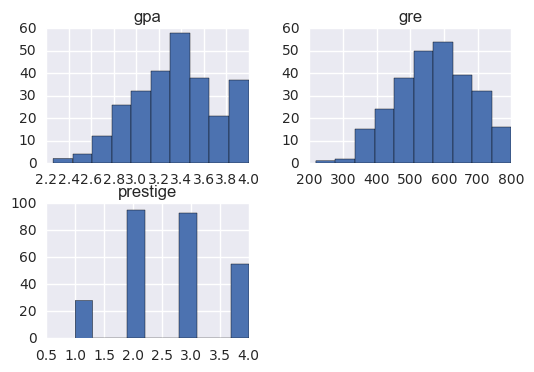

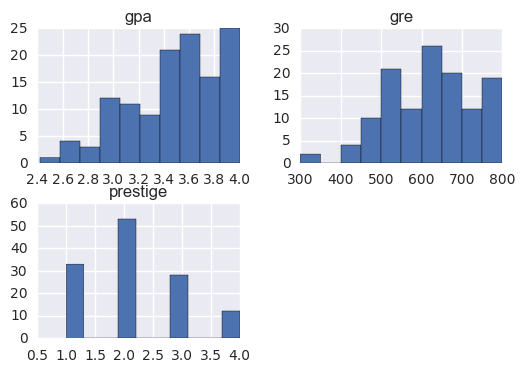

In [163]:
df_raw.groupby('admit').hist()

In [164]:
df_raw.groupby('admit').describe()

gpa         gre    prestige
admit                                          
0     count  271.000000  271.000000  271.000000
      mean     3.347159  573.579336    2.645756
      std      0.376355  116.052798    0.918922
      min      2.260000  220.000000    1.000000
      25%      3.080000  500.000000    2.000000
      50%      3.340000  580.000000    3.000000
      75%      3.610000  660.000000    3.000000
      max      4.000000  800.000000    4.000000
1     count  126.000000  126.000000  126.000000
      mean     3.489206  618.571429    2.150794
      std      0.371655  109.257233    0.921455
      min      2.420000  300.000000    1.000000
      25%      3.220000  540.000000    1.000000
      50%      3.545000  620.000000    2.000000
      75%      3.757500  680.000000    3.000000
      max      4.000000  800.000000    4.000000

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [165]:
normaltest(df_raw['admit'])

NormaltestResult(statistic=2203.8207987184628, pvalue=0.0)

In [166]:
normaltest(df_raw['gpa'])

NormaltestResult(statistic=13.079875560916445, pvalue=0.001444578377229117)

In [167]:
normaltest(df_raw['gre'])

NormaltestResult(statistic=3.8179829306094266, pvalue=0.14822980613776662)

In [168]:
normaltest(df_raw['prestige'])

NormaltestResult(statistic=49.421253219400995, pvalue=1.8548603556153736e-11)

In [169]:
normaltest(df_raw)

NormaltestResult(statistic=array([ 2203.82079872,     3.81798293,    13.07987556,    49.42125322]), pvalue=array([  0.00000000e+00,   1.48229806e-01,   1.44457838e-03,
         1.85486036e-11]))

Answer: yes for gpa and gre

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

Yes because it is skewed

#### Question 11. Which of our variables are potentially colinear? 

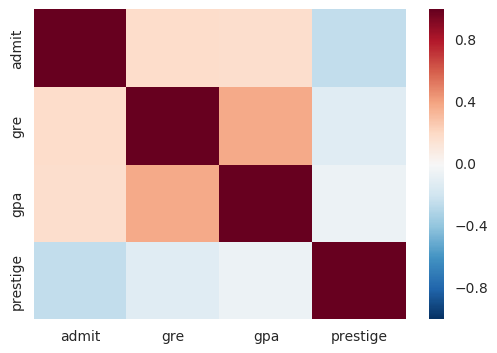

In [170]:
# create a correlation matrix for the data
sns.heatmap(df_raw.corr())


#### Question 12. What did you find?

Answer: 

gpa and gre and potentially colinear

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

In [171]:
df_raw.groupby('admit')['prestige'].describe()
#then would need to better understand the significance of this 

admit       
0      count    271.000000
       mean       2.645756
       std        0.918922
       min        1.000000
       25%        2.000000
       50%        3.000000
       75%        3.000000
       max        4.000000
1      count    126.000000
       mean       2.150794
       std        0.921455
       min        1.000000
       25%        1.000000
       50%        2.000000
       75%        3.000000
       max        4.000000
Name: prestige, dtype: float64

#### Question 14. What is your hypothesis? 

Answer: 

In [172]:
#would hypothesize that better prestige leads to higher chance of admit

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [ ]:
df_raw = df_raw[numpy.logical_not(numpy.isnan(x))]

#### 2. Bonus: Log transform the skewed data

In [173]:
lognorm(df_raw)

#### 3. Advanced: Impute missing data

In [174]:
df_raw.fillna(df_raw.mean(), inplace=True)

admit    gre   gpa  prestige
0        0  380.0  3.61       3.0
1        1  660.0  3.67       3.0
2        1  800.0  4.00       1.0
3        1  640.0  3.19       4.0
4        0  520.0  2.93       4.0
5        1  760.0  3.00       2.0
6        1  560.0  2.98       1.0
7        0  400.0  3.08       2.0
8        1  540.0  3.39       3.0
9        0  700.0  3.92       2.0
10       0  800.0  4.00       4.0
11       0  440.0  3.22       1.0
12       1  760.0  4.00       1.0
13       0  700.0  3.08       2.0
14       1  700.0  4.00       1.0
15       0  480.0  3.44       3.0
16       0  780.0  3.87       4.0
17       0  360.0  2.56       3.0
18       0  800.0  3.75       2.0
19       1  540.0  3.81       1.0
20       0  500.0  3.17       3.0
21       1  660.0  3.63       2.0
22       0  600.0  2.82       4.0
23       0  680.0  3.19       4.0
24       1  760.0  3.35       2.0
25       1  800.0  3.66       1.0
26       1  620.0  3.61       1.0
27       1  520.0  3.74       4.0
28       1  780.0  3.22       2.0
29       0  520.0  3.29       1.0
..     ...    ...   ...       ...
370      1  540.0  3.77       2.0
371      1  680.0  3.76       3.0
372      1  680.0  2.42       1.0
373      1  620.0  3.37       1.0
374      0  560.0  3.78       2.0
375      0  560.0  3.49       4.0
376      0  620.0  3.63       2.0
377      1  800.0  4.00       2.0
378      0  640.0  3.12       3.0
379      0  540.0  2.70       2.0
380      0  700.0  3.65       2.0
381      1  540.0  3.49       2.0
382      0  540.0  3.51       2.0
383      0  660.0  4.00       1.0
384      1  480.0  2.62       2.0
385      0  420.0  3.02       1.0
386      1  740.0  3.86       2.0
387      0  580.0  3.36       2.0
388      0  640.0  3.17       2.0
389      0  640.0  3.51       2.0
390      1  800.0  3.05       2.0
391      1  660.0  3.88       2.0
392      1  600.0  3.38       3.0
393      1  620.0  3.75       2.0
394      1  460.0  3.99       3.0
395      0  620.0  4.00       2.0
396      0  560.0  3.04       3.0
397      0  460.0  2.63       2.0
398      0  700.0  3.65       2.0
399      0  600.0  3.89       3.0

[397 rows x 4 columns]